# Statistics for Data Science
Summer 2025
Group 4

## Team members
- Jack (Xianguo) Hao
- Duc Vu Hoang
- Krishna Shah
- Joginder Singh

---

## **1. Problem Definition**

### **1.1 Hypothesis and Objectives of our Analysis**

---

## **2. Data Preparation**

### **2.1 Package requirements**

Besides the default Python Anaconda installation (Python version 3.12.7), please install the following additional packages:
- Geopandas

### **2.2 Importing Modules**

In [3]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np

# Importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
import matplotlib.colors as mcolors

# Importing libraries for statistical analysis
import statsmodels.api as sm
import matplotlib.ticker as ticker
# Importing libraries for machine learning
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Importing libraries for geospatial analysis
import geopandas as gpd

#Importing libraries for an interactive charts
import plotly.express as px

### **2.3 Reading the data**

In [4]:
# Load the dataset
# The dataset contains the cost of living in various US cities
df = pd.read_csv('../data/cost_of_living_us.csv', na_values = '\xa0')
df.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


### **2.4 Inspecting the Data**

Checking for missing values and Garbage values

In [5]:
# Using the info() method to get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [6]:
# Using the describe() method to get a summary of the DataFrame
# Note - Describe for int / float values
df.describe()

,case_id,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
count,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31420.000000
mean,1589.311804,11073.673539,8287.504557,13593.856381,13394.031748,7015.318377,9879.584233,7657.714782,70901.683601,68315.997017
std,917.218414,4165.606147,3271.140249,1640.456562,5204.545710,2397.415490,6778.223399,3339.795571,21846.545235,16886.970245
min,1.000000,4209.311280,2220.276840,2216.461440,3476.379960,2611.642080,0.000000,1027.800756,30087.662400,25529.976562
25%,792.000000,8580.000000,5801.424360,12535.159800,9667.440000,5286.354120,5341.621590,5597.970360,53776.019400,57223.988281
50%,1593.000000,10416.000000,8129.156280,13698.164400,13082.700000,6733.056120,10166.340120,6898.468860,70977.682800,65955.605469
75%,2386.000000,12444.000000,10703.624280,14765.758500,16657.816800,8413.090230,14276.377800,8790.207270,85371.341100,76136.070312
max,3171.000000,61735.587600,31178.619600,19816.482000,37252.274400,28829.443200,48831.085200,47753.390400,223717.548000,177662.468750


In [7]:
#Note - Data describe for Object values
df.describe(include=['O'])

,state,areaname,county,family_member_count
count,31430,31430,31430,31430
unique,51,2561,1877,10
top,TX,"Atlanta-Sandy Springs-Roswell, GA HUD Metro FM...",Washington County,1p0c
freq,2540,240,300,3143


In [8]:
# Duplicate Data 
# Check for duplicate rows in the DataFrame
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.count()

case_id                   0
state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
dtype: int64

In [9]:
# Null Data
# Checking for null values in the DataFrame
df.isnull().sum()

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64

### **2.5 Initial Observations**

1. The data set contains 31430 rows and 15 columns 
2. Max case_id value is 3171, however each row should have unique value and max value should be 31430 does this mean there are duplicate case_id values, and if yes what does that mean ? Additionally, as per duplicate check there are no duplicate rows. Further analysis is required and also if it would make sense to type cast this column to string / object.
3. Childcare_cost has $0 values - does that mean there is missing values?
4. There are 51 unique state values - further investigation is required, considering there are 50 States in United States
5. Does values in 'areaname' columns are concatenated ? for instance 'Atlanta-Sandy.. ' and 'GA HUD Metro ..' is same area name or separate areanames
6. values in family_member_count also requires further investigation as it seems values in this field are coded. For instance does 1p0c means 1 person and no child ? if yes, this column is good candidate for Feature Engineer i.e. split parent and childrens information. 
7. there are 10 ( 0.03% ) rows where median_family_income is Null. Potentially can drop these rows 10 rows without as the count is not significant (however will inspect for any pattern of Null rows i.e. all from same state/county etc.)
8. As per wikipedia, in US there are 3,244 counties, however the dataset used for analysis only has data for 1877 counties. This indicates the data set is subset of US counties and is not representing the full population ( Wiki Link https://en.wikipedia.org/wiki/List_of_United_States_counties_and_county_equivalents#:~:text=In%20total%2C%20the%2050%20states,United%20States%20as%20county%20equivalents.) Note: After further analysis, the data set has data for 3133 counties and for 89 counties data is not available. The unique county count fo 1877 is misleading since, same county name is reused in multiple states for example 'Washington Conunty' is common against 30 states. Additionally, Puerto Rico state has the majority of data missing (78 counties) followed by Connecticut and Alaska, for which we don't have county data for 9 and 2 counties respectively.

### **2.6 Rough work**

In [10]:
# Note - investigating case_id
df[df['case_id'] == 3].head(3)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
20,3,AL,False,"Barbour County, AL",Barbour County,1p0c,5856.0,3237.03924,10890.72876,5686.79004,3294.76680,0.00000,5458.27740,34423.6020,42822.753906
21,3,AL,False,"Barbour County, AL",Barbour County,1p1c,7776.0,4770.60900,11436.48264,8495.95680,4546.13124,4846.73616,5425.51176,47297.4288,42822.753906
22,3,AL,False,"Barbour County, AL",Barbour County,1p2c,7776.0,6989.73852,12036.79440,11305.12356,5350.20960,11644.67508,6235.30884,61337.8476,42822.753906


In [11]:
# According to the original kaggle dataset, case_id is defined as: 'Unique identifier for each areaname.'
# However, there are 3171 case_id's (or at least that's the largest value for case_id - maybe they're not all consecutive),
# and there are only 2561 areaname values - something is missing here.

# Theory: cased_id refers to the unique identifier for each unique 2-tuple of (areaname,county) and a lot of the county names are duplicated.
unique_elements = df['case_id'].nunique()
print(f"Unique case_id values: {unique_elements}")

Unique case_id values: 3143


In [12]:
# There are 28 missing (3171-3143=28) - how strange

# case_id ranges between 1 and 3171
missing_case_id = {i+1 for i in range(3171)} - set(df['case_id'].value_counts().keys().to_list())
missing_case_id

{310,
 311,
 315,
 317,
 318,
 320,
 1187,
 1195,
 1202,
 1203,
 1230,
 1232,
 1233,
 1234,
 1237,
 1242,
 1245,
 1247,
 1250,
 1251,
 1252,
 1793,
 1794,
 1797,
 1798,
 1799,
 2342,
 2345}

In [13]:
# Well that's not a random subset - it's far too clustered.

# Speculation - case_id could be some univerally agreed upon numbering system for identifying locations with numbers, and we happen to not have any data for those missing 28 locations.
# Alternatively, we could be missing data - the url of the kaggle dataset does specify 3171 counties, even though the current name is only 1877 counties.
    # It's possible that the initial version had more data, but perhaps was missing data or had null values.
    # later versions had cleaning performed which resulted dropping rows and now we have no data for those 28 areanames.
    # On the other hand, the maximum value of case_id is 3171, so maybe this was simply a typo when the dataset was initially posted.

# Moving on, how many 2-tuples of (areaname,county) are there?
# This is the same as the number of unique areanames and counties.
# We can check this by grouping by areaname and county, and counting the number of unique values in each group.
df.groupby(['areaname', 'county']).count()

case_id  state  \
areaname                             county                             
Abbeville County, SC                 Abbeville County       10     10   
Abilene, TX MSA                      Callahan County        10     10   
                                     Jones County           10     10   
                                     Taylor County          10     10   
Acadia Parish, LA HUD Metro FMR Area Acadia Parish          10     10   
...                                                        ...    ...   
Yuma County, CO                      Yuma County            10     10   
Yuma, AZ MSA                         Yuma County            10     10   
Zapata County, TX                    Zapata County          10     10   
Zavala County, TX                    Zavala County          10     10   
Ziebach County, SD                   Ziebach County         10     10   

                                                       isMetro  \
areaname                             county                      
Abbeville County, SC                 Abbeville County       10   
Abilene, TX MSA                      Callahan County        10   
                                     Jones County           10   
                                     Taylor County          10   
Acadia Parish, LA HUD Metro FMR Area Acadia Parish          10   
...                                                        ...   
Yuma County, CO                      Yuma County            10   
Yuma, AZ MSA                         Yuma County            10   
Zapata County, TX                    Zapata County          10   
Zavala County, TX                    Zavala County          10   
Ziebach County, SD                   Ziebach County         10   

                                                       family_member_count  \
areaname                             county                                  
Abbeville County, SC                 Abbeville County                   10   
Abilene, TX MSA                      Callahan County                    10   
                                     Jones County                       10   
                                     Taylor County                      10   
Acadia Parish, LA HUD Metro FMR Area Acadia Parish                      10   
...                                                                    ...   
Yuma County, CO                      Yuma County                        10   
Yuma, AZ MSA                         Yuma County                        10   
Zapata County, TX                    Zapata County                      10   
Zavala County, TX                    Zavala County                      10   
Ziebach County, SD                   Ziebach County                     10   

                                                       housing_cost  \
areaname                             county                           
Abbeville County, SC                 Abbeville County            10   
Abilene, TX MSA                      Callahan County             10   
                                     Jones County                10   
                                     Taylor County               10   
Acadia Parish, LA HUD Metro FMR Area Acadia Parish               10   
...                                                             ...   
Yuma County, CO                      Yuma County                 10   
Yuma, AZ MSA                         Yuma County                 10   
Zapata County, TX                    Zapata County               10   
Zavala County, TX                    Zavala County               10   
Ziebach County, SD                   Ziebach County              10   

                                                       food_cost  \
areaname                             county                        
Abbeville County, SC                 Abbeville County         10   
Abilene, TX MSA                      Callahan County          10   
                                   

In [14]:
# Since there are 3143 rows of the above grouped dataframe, there are in fact 3143 different 2-tuples of (areaname, county).
# This is precisely the number of different case_id's, so we just need to check that they perfectly overlap.

# But first, why are they all 10?
df.groupby(['areaname', 'county']).count()['case_id'].value_counts()

case_id
10    3143
Name: count, dtype: int64

In [15]:
# It seems we have exactly 10 rows per case_id.
# If we group by case_id, areaname, and county and end up with exactly 3143 rows again, then this mystery is solved.
df.groupby(['case_id', 'areaname', 'county']).count().shape

(3143, 12)

Therefore, the attribute 'case_id' refers not to the index of the row, but instead a unique numeric identifier for each unique ('areaname', 'county') 2-tuple. The values that 'case_id' takes range between 1 and 3171, however, 28 numbers are skipped as there are only 3143 unique values. Further investigation is required to explain this.

There is also exactly 10 rows of data per 'case_id' value.

In [16]:
# Now checking childcare_cost
# Childcare cost is sometimes 0 - is this a problem? are there missing values?
# if there aren't any children in the household, then it would make sense that the childcare costs are also 0.
# if these are the only instances of 0 childcare costs, then there is no problem.

df[df['childcare_cost'] == 0]['family_member_count'].value_counts()

family_member_count
1p0c    3143
2p0c    3143
Name: count, dtype: int64

In [17]:
# That is exactly the case.
# Another question: are those numbers exactly 10% of our dataset?
df['family_member_count'].value_counts()

family_member_count
1p0c    3143
1p1c    3143
1p2c    3143
1p3c    3143
1p4c    3143
2p0c    3143
2p1c    3143
2p2c    3143
2p3c    3143
2p4c    3143
Name: count, dtype: int64

In [18]:
# There are exactly 10 rows per case_id and each family_member_count is represented exactly 1/10th of the time - is this related?
df.groupby(['family_member_count', 'case_id']).count().shape

(31430, 13)

The attribute 'childcare_cost' is sometimes 0, which is a red flag. However, it only occurs when the household happens to have no children, so it's entirely reasonable (also, it's always 0 when the household has no children).

Also, family_member_count has only 10 different possible values, each represented by a tenth of the total dataset. Furthermore, for each value of case_id, there are 10 rows - and each of these rows has one of the different values of 'family_member_count'.

In [19]:
# There are 51 states in our dataset, but aren't there only 50?

us_states = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California", 
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}

df_states = set(df['state'].value_counts().keys().to_list())
# get the states in our dataset as a set
fifty_states = set(us_states.keys())
# get the actual 50 states as a set
df_states - fifty_states
# perform set subtraction to determine the extra state

# The extra state is DC - District of Columbia.
# This is a federal district, not a state, but it is included in the dataset as a state.
# This is a common practice in datasets that include US states, as DC is often treated as a state for statistical purposes.

# Updating the us_states dictionary to include DC
us_states["DC"] = "District of Columbia"

### **2.7 Dealing with the "10 Null values"**

The 10 missing values for 'median_family_income' all come from the same case_id (all the rows for that case_id value have this data missing).
These 10 missing values are relative few in comparison to the entire database.
One reasonable way to fill in these 10 values is to use the average of the median family income based on the area, the state, and if it is metro or note

In [20]:
# The 10 rows with null values for median_family_income - each case_id value has 10 rows
df[df['median_family_income'].isnull()]

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
15110,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p0c,8052.0,3019.16160,11086.4934,6505.34988,4011.51852,0.00000,6075.80856,38750.3316,NaN
15111,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p1c,11256.0,4449.51084,11722.2708,9930.74856,5690.72604,7555.66332,7196.82420,57801.7440,NaN
15112,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p2c,11256.0,6519.27612,12405.8652,13356.14640,6440.68356,14323.03800,8732.72244,73033.7340,NaN
15113,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p3c,14688.0,8697.00216,12854.8620,16781.54400,8473.30884,16405.30800,11755.84356,89655.8676,NaN
15114,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p4c,14688.0,10645.71900,13619.9388,20206.94280,9179.40600,16405.30800,12372.99120,97118.3088,NaN
15115,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p0c,8772.0,5535.13032,12918.5988,13010.70000,5184.03768,0.00000,7023.17208,52443.6384,NaN
15116,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p1c,11256.0,6889.02612,13557.9828,16436.09760,6574.65816,7555.66332,8939.94504,71209.3716,NaN
15117,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p2c,11256.0,8724.80352,13977.7980,19861.49760,7239.83280,14323.03800,9841.96872,85224.9372,NaN
15118,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p3c,14688.0,10652.32248,14798.7552,23286.89520,9181.79808,16405.30800,11854.97676,100868.0508,NaN
15119,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p4c,14688.0,13035.88920,14802.7416,26712.29280,10045.45896,16405.30800,12050.91480,107740.6056,NaN


In [21]:
#Fill NaN values of median_family_income with the mean of median_family_income based on state, isMetro and area
df['median_family_income'] = df.groupby(['state','isMetro','areaname'])['median_family_income'].transform(lambda x: x.fillna(x.mean()))

In [22]:
# Checking again for null values in the DataFrame
df.isnull().sum()

case_id                   0
state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
dtype: int64

### **2.8 Data preparation for county and states**

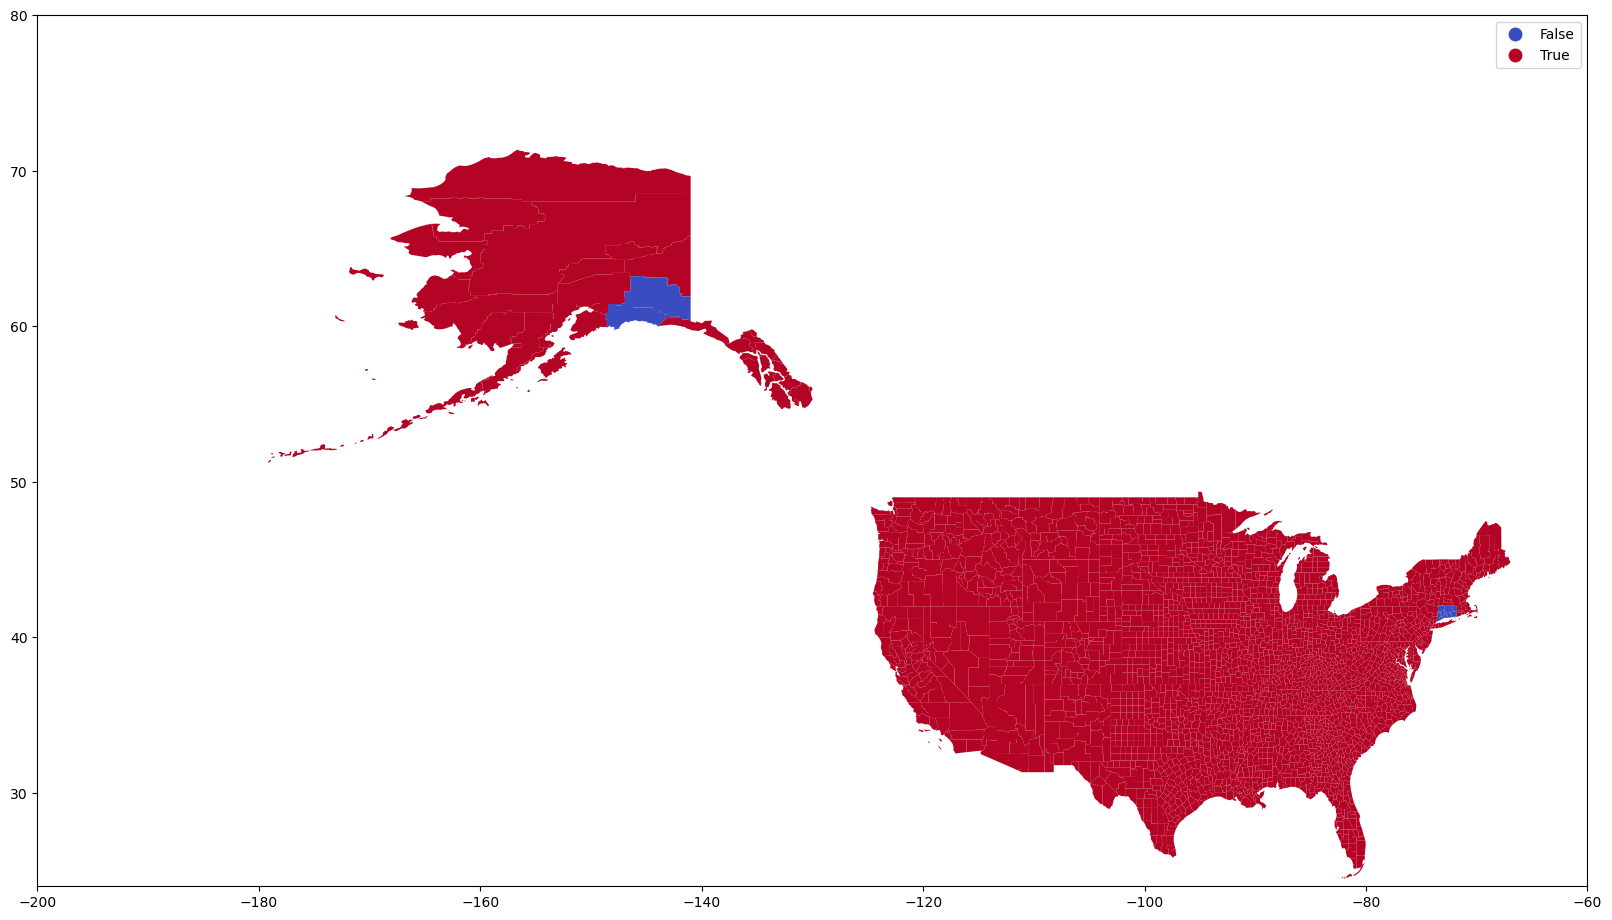

In [24]:
 #Data preparation for which counties we have data and for which we don't

# New state_county column
# Create a new column 'state_county' by concatenating 'state' and 'county' columns

# Step 1 : Combine state and county for lookup
df['state_county'] = df['state'] + '-' + df['county']

# Step 2: Use a FIPS reference file
fips_ref = pd.read_csv("https://raw.githubusercontent.com/kjhealy/fips-codes/master/state_and_county_fips_master.csv")

# ---- Note Alternative to Step 2 ----
# Step 2: If the former FIPS reference file is not available, use the one from the local directory
# Load the FIPS reference file
# fips_ref = pd.read_csv('../data/state_and_county_fips_master.csv')

## there were few State-County pairs in DF dataFrame which did not exist in Fibs Data Set, appending FIBS code for these data sets 
new_data = pd.DataFrame({
'fips':['02158','17099','29211','35013','46102'],
'name':['Kusilvak Census Area','La Salle County','Sullivan part','Dona Ana County','Oglala Lakota County'],
'state':['AK','IL','MO','NM','SD']
})

#print(fips_ref.info())
#print(fips_ref.head(2))
#print(new_data.head(1))

fips_ref = pd.concat([fips_ref, new_data], ignore_index = True)


# Check if the new data has been appended correctly
#print(fips_ref[fips_ref['fips'].isin(new_data['fips'])])

# Create same format in ref for join
fips_ref['state_county'] = fips_ref['state'] + '-' + fips_ref['name']
fips_ref['fips'] = fips_ref['fips'].apply(lambda x: str(x).zfill(5))


# Merge to get FIPS in your dataset
if 'fips' in df.columns:
    df = df.drop(columns='fips')

df = df.merge(fips_ref[['state_county', 'fips']], on='state_county', how='left')

# Step 3: Load shapefile
# Load US counties shapefile (from geopandas' datasets)
#us_counties = gpd.read_file("C:/Users/kdhru/Documents/maps/cb_2022_us_county_20m/cb_2022_us_county_20m.shp")
us_counties = gpd.read_file('../data/cb_2022_us_county_20m/cb_2022_us_county_20m.shp')

# Step 4: Add a flag for counties that exist in your data
us_counties['has_data'] = us_counties['GEOID'].isin(df['fips'])

# Step 5: Plot
#us_counties.plot(column='has_data', legend=True, figsize=(15,10), cmap='coolwarm')

ax = us_counties.plot(column='has_data', legend=True, figsize=(20, 15), cmap='coolwarm')

# Set the limits to focus on the USA region
ax.set_xlim(-200, -60)  # Longitude range for the USA
ax.set_ylim(24, 80)     # Latitude range for the contiguous USA

plt.show()

Rough work to invistigate missing FIBS value for State-county pair

In [25]:
missing_fips = df[df['fips'].isna()]

missing_summary = missing_fips['state_county'].value_counts().reset_index()
missing_summary.columns = ['state_county', 'missing_count']
print(missing_summary)

Empty DataFrame
Columns: [state_county, missing_count]
Index: []


In [26]:
us_counties.groupby('has_data').size()

has_data
False      89
True     3133
dtype: int64

In [27]:
us_counties[us_counties['has_data'] == False]

missing_summary = us_counties[us_counties['has_data'] == False]
missing_count_by_state = missing_summary.groupby(['STATE_NAME']).size().reset_index(name='missing_count')

print(missing_count_by_state)

    STATE_NAME  missing_count
0       Alaska              2
1  Connecticut              9
2  Puerto Rico             78


In [28]:
# Checking again for null values in the DataFrame
df.isnull().sum()

case_id                   0
state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
state_county              0
fips                      0
dtype: int64

### **2.9 Data Enrichment, Data Transformation / Feature Engineering**

The following new columns were added to our dataframe to faciliate our analysis calculations:

| Item        | New Column           | Variable Type | Description                                                                 |
|-------------|----------------------|---------------|-----------------------------------------------------------------------------|
| 1           | state_name           | string        | Long form state name (mapped from state code, e.g. Alabama from AL)         |
| 2           | parent_count         | int           | Number of parents in the household (mapped from family_member_count)        |
| 3           | children_count       | int           | Number of children in the household (mapped from family_member_count)       |
| 4           | family_size          | int           | Total number of people in the household (mapped from family_member_count)   |
| 5           | Housing_%            | float         | Percentage of housing cost relative to the total cost                       |
| 6           | Food_%               | float         | Percentage of food cost relative to the total cost                          |
| 7           | Transportation_%     | float         | Percentage of transportation cost relative to the total cost                |
| 8           | Healthcare_%         | float         | Percentage of healthcare cost relative to the total cost                    |
| 9           | Other_%              | float         | Percentage of other costs relative to the total cost                        |
| 10          | Childcare_%          | float         | Percentage of childcare cost relative to the total cost                     |
| 11          | Taxes_%              | float         | Percentage of taxes relative to the total cost                              |
| 12          | Affordability metric | float         | Total cost as a percentage of the median income                             |
| 13          | MSA                  | string        | Metropolitan Statiscal Area (used for geographical area analysis)           |

*Note: Investigated but ultimately dropped:*

delta_cost_of_living = Difference in calculated Cost of Living - total_cost [Note: should be 0 for all rows] -> dropped since the data was correct

In [29]:
# Total cost was checked (just to confirm that it was the sum of all costs)
# Is there any difference between Cost of Living and Total Cost ?

df['total_cost_calculated'] = df['housing_cost'] + df['food_cost'] + df['transportation_cost'] + df['healthcare_cost'] + df['other_necessities_cost'] + df['childcare_cost'] + df['taxes']

df['delta_total_cost'] = df['total_cost_calculated'] - df['total_cost']
df['delta_total_cost'] = df['delta_total_cost'].astype(int)

df[(df['delta_total_cost'] < 0 ) | (df['delta_total_cost'] > 0) ].head(3)

df.groupby(['delta_total_cost'])['delta_total_cost'].sum()

# conclusion total_cost is summation of all types of costs available in the data set. 

delta_total_cost
0    0
Name: delta_total_cost, dtype: int32

In [30]:
# Drop calculated columns since the total_cost is already available in the dataset
df = df.drop(['delta_total_cost','total_cost_calculated'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31430 non-null

In [31]:
# Map state codes to state names
df['state_name'] = df['state'].map(us_states)

df.head(3)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,state_county,fips,state_name
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,AL-Autauga County,01001,Alabama
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,AL-Autauga County,01001,Alabama
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,AL-Autauga County,01001,Alabama


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31430 non-null

In [33]:
# Since family_member_count is highly structured, we don't need to do anything fancy to extract the number of parents/children.
df['parent_count'] = df['family_member_count'].str[0].astype(int)
df['children_count'] = df['family_member_count'].str[2].astype(int)
df['family_size'] = df['parent_count'] + df['children_count']

df.head(3)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,...,childcare_cost,taxes,total_cost,median_family_income,state_county,fips,state_name,parent_count,children_count,family_size
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,...,0.0000,6392.94504,39254.0532,73010.414062,AL-Autauga County,01001,Alabama,1,0,1
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,...,6147.8298,7422.07836,57194.3256,73010.414062,AL-Autauga County,01001,Alabama,1,1,2
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,...,15824.6940,9769.56228,76141.0308,73010.414062,AL-Autauga County,01001,Alabama,1,2,3


In [34]:
# visualize 
df.groupby(['family_member_count']).agg(count_all = ('family_size', 'sum'),
    cnt_children = ('children_count', 'sum'),
    cnt_parent = ('parent_count', 'sum'),
)

,count_all,cnt_children,cnt_parent
family_member_count,,,
1p0c,3143,0,3143
1p1c,6286,3143,3143
1p2c,9429,6286,3143
1p3c,12572,9429,3143
1p4c,15715,12572,3143
2p0c,6286,0,6286
2p1c,9429,3143,6286
2p2c,12572,6286,6286
2p3c,15715,9429,6286


In [35]:
# Calculating the percentage of each cost category relative to the total cost
df["Housing_%"] = (df["housing_cost"] / df["total_cost"]) * 100
df["Food_%"] = (df["food_cost"] / df["total_cost"]) * 100
df["Transportation_%"] = (df["transportation_cost"] / df["total_cost"]) * 100
df["Healthcare_%"] = (df["healthcare_cost"] / df["total_cost"]) * 100
df["Other_%"] = (df["other_necessities_cost"] / df["total_cost"]) * 100
df["Childcare_%"] = (df["childcare_cost"] / df["total_cost"]) * 100
df["Taxes_%"] = (df["taxes"] / df["total_cost"]) * 100

In [36]:
# Creating an affordability metric (total_cost as % of median income)
# If the total cost is high relative to the median family income, it indicates lower affordability.
# In other words, a higher percentage indicates lower affordability.
# Affordability = 100 means that the total cost is equal to the median family income.
# Affordability > 100 means that the total cost is greater than the median family income.
# Affordability < 100 means that the total cost is less than the median family income.
df['affordability'] = (df['total_cost'] / df['median_family_income']) * 100

In [37]:
# Extract MSA (Metropolitan Statistical Area) information
df['MSA'] = df['areaname'].str.extract(r'^(.*?)(?: MSA|,|$)', expand=False)

In [38]:
# Showing the updated DataFrame
df.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,...,family_size,Housing_%,Food_%,Transportation_%,Healthcare_%,Other_%,Childcare_%,Taxes_%,affordability,MSA
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,...,1,21.668409,8.801428,27.587390,14.616274,11.040423,0.000000,16.286076,53.765006,Montgomery
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,...,2,21.099125,8.902470,20.261088,15.140587,10.870762,10.749021,12.976949,78.337216,Montgomery
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,...,3,15.848882,9.797875,16.235369,15.210764,9.292832,20.783399,12.830877,104.287904,Montgomery
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,...,4,16.195943,10.564614,14.279917,15.396140,9.696405,19.959113,13.907868,129.027528,Montgomery
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,...,5,15.132531,12.082710,13.632333,17.283453,9.861155,18.648614,13.359203,138.094711,Montgomery


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31430 non-null

## **3. Analysis**